<a href="https://colab.research.google.com/github/esmacicek/esmacicek/blob/main/deneme1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri yolları
data_paths = {
    'MildDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/MildDemented',
    'ModerateDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/ModerateDemented',
    'NonDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/NonDemented',
    'VeryMildDemented': '/content/drive/My Drive/alz.dmn.project/OriginalDataset/VeryMildDemented'
}

# Görüntü boyutları ve veri artırma parametreleri
img_width, img_height = 224, 224
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Görüntüleri yükleme ve ön işleme fonksiyonu
def load_and_preprocess_images(data_path, img_width, img_height, augment=False, n_augmented=0):
    images = []
    for img_file in os.listdir(data_path):
        img_path = os.path.join(data_path, img_file)

        # Görüntüyü yükle, boyutlandır ve normalleştir
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_width, img_height))
        img = img / 255.0
        images.append(img)

        # Veri artırma
        if augment:
            img = img.reshape((1, img_width, img_height, 1))
            aug_iter = datagen.flow(img, batch_size=1)
            for _ in range(n_augmented):
                aug_img = next(aug_iter)[0].reshape(img_width, img_height)
                images.append(aug_img)

    return images

# Veri yükleme ve veri artırma
all_images = []
all_labels = []
for label, path in data_paths.items():
    # Veri artırma miktarını belirle
    n_augment = 3 if label in ['MildDemented', 'ModerateDemented'] else 0

    images = load_and_preprocess_images(path, img_width, img_height, augment=(n_augment > 0), n_augmented=n_augment)
    all_images.extend(images)
    all_labels.extend([label] * len(images))  # Etiketleri ekle

# Numpy dizisine dönüştürme
all_images = np.array(all_images)
all_labels = np.array(all_labels)

print("Toplam yüklenen görüntü sayısı:", len(all_images))

Toplam yüklenen görüntü sayısı: 9280


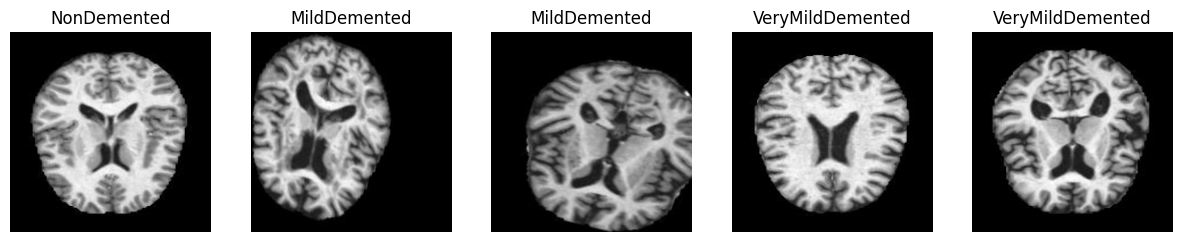

In [3]:
import matplotlib.pyplot as plt

# Rastgele seçilen görüntüleri gösterme
def show_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        img = images[idx]
        label = labels[idx]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.show()

# Örnek görüntüleri göster
show_sample_images(all_images, all_labels)

MildDemented için işlenen görüntülerin görselleştirmesi:


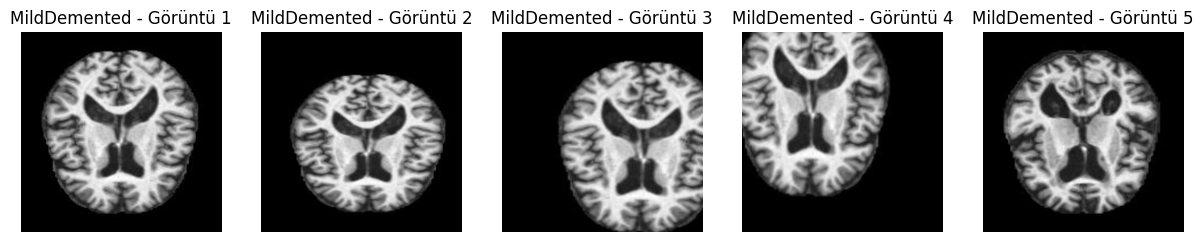

ModerateDemented için işlenen görüntülerin görselleştirmesi:


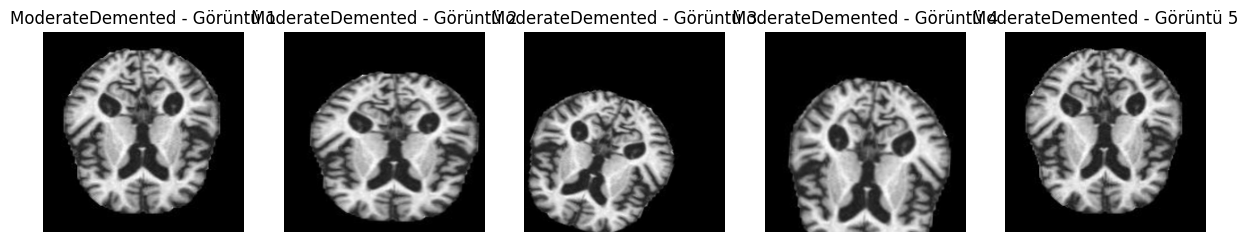

NonDemented için işlenen görüntülerin görselleştirmesi:


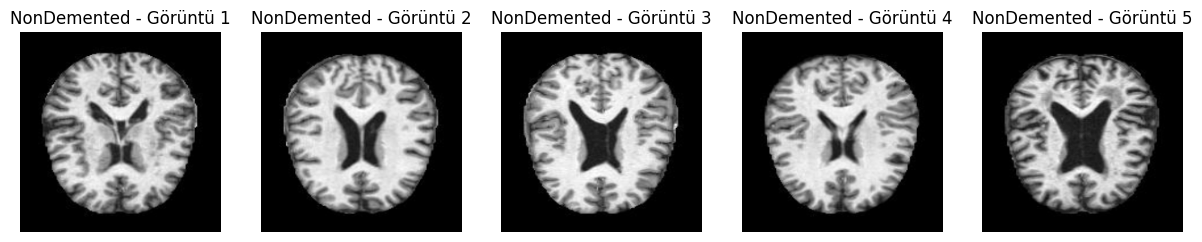

VeryMildDemented için işlenen görüntülerin görselleştirmesi:


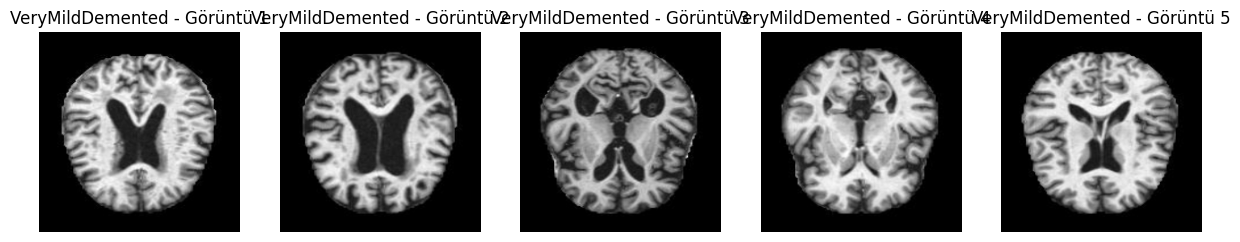

Toplam yüklenen görüntü sayısı: 9280
MildDemented: 3584 görüntü
ModerateDemented: 256 görüntü
NonDemented: 3200 görüntü
VeryMildDemented: 2240 görüntü


In [5]:
import matplotlib.pyplot as plt

# İşlenmiş görüntü örneklerini görselleştirme fonksiyonu
def visualize_processed_images(all_images, all_labels, num_samples=5):
    unique_labels = np.unique(all_labels)
    for label in unique_labels:
        print(f"{label} için işlenen görüntülerin görselleştirmesi:")
        label_indices = np.where(all_labels == label)[0]
        if len(label_indices) > 0:
            plt.figure(figsize=(15, 3))
            for i in range(min(num_samples, len(label_indices))):
                idx = label_indices[i]
                img = all_images[idx]

                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"{label} - Görüntü {i+1}")
                plt.axis('off')
            plt.show()

# Toplam ve kategoriye göre yüklenen görüntü sayısını yazdırma fonksiyonu
def print_image_counts(all_labels):
    unique_labels = np.unique(all_labels)
    print(f"Toplam yüklenen görüntü sayısı: {len(all_images)}")
    for label in unique_labels:
        count = np.sum(all_labels == label)
        print(f"{label}: {count} görüntü")

# Fonksiyonları çağır
visualize_processed_images(all_images, all_labels)
print_image_counts(all_labels)

MildDemented için işlenen görüntülerin görselleştirmesi:


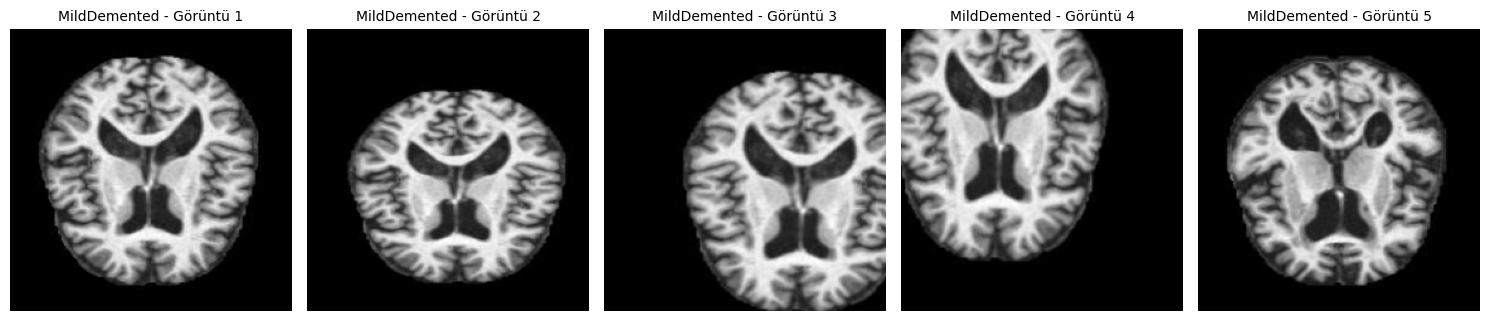

ModerateDemented için işlenen görüntülerin görselleştirmesi:


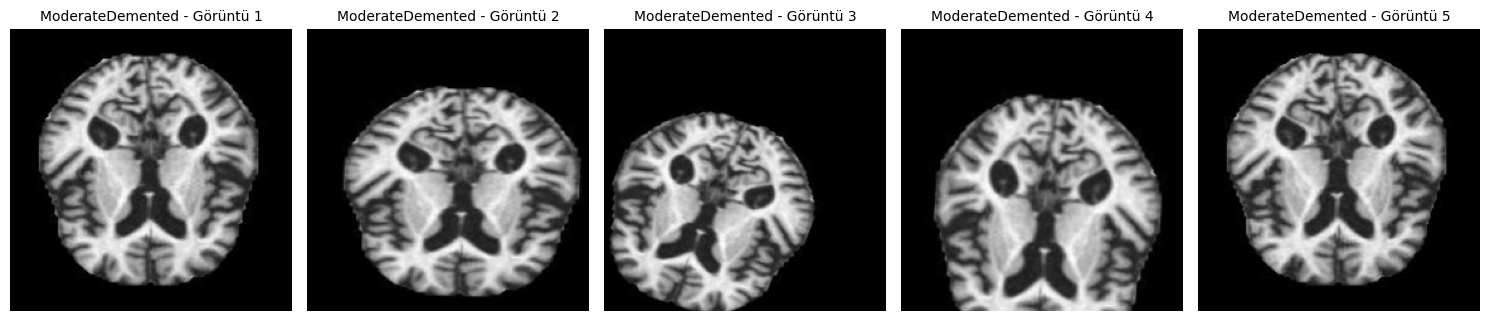

NonDemented için işlenen görüntülerin görselleştirmesi:


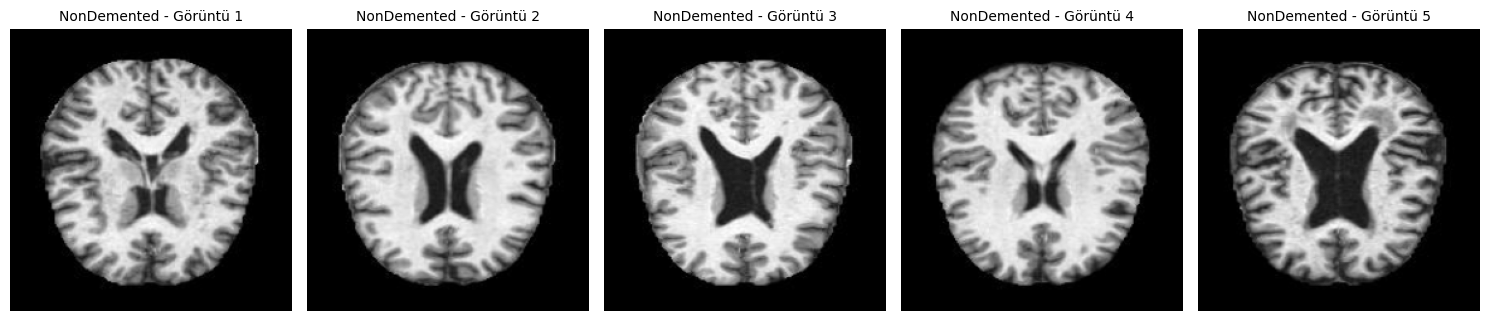

VeryMildDemented için işlenen görüntülerin görselleştirmesi:


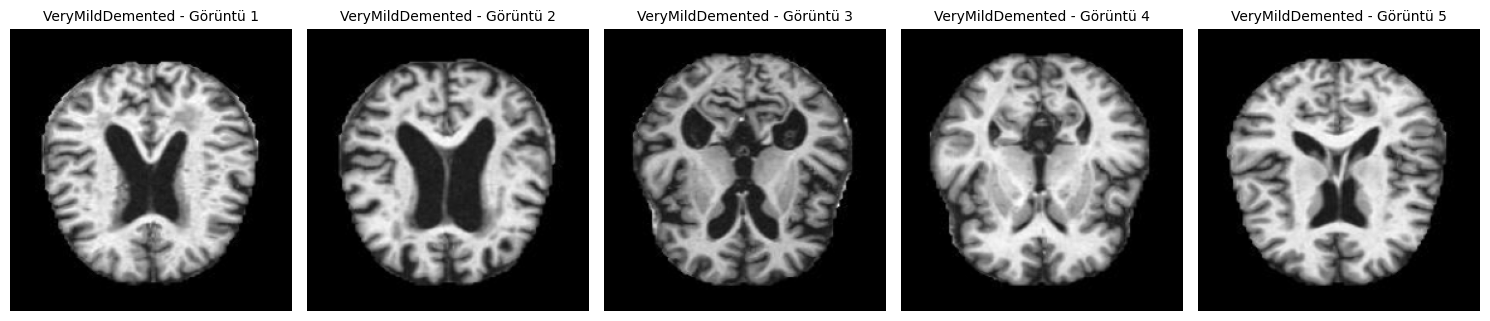

Toplam yüklenen görüntü sayısı: 9280
MildDemented: 3584 görüntü
ModerateDemented: 256 görüntü
NonDemented: 3200 görüntü
VeryMildDemented: 2240 görüntü


In [6]:
import matplotlib.pyplot as plt

# İşlenmiş görüntü örneklerini görselleştirme fonksiyonu
def visualize_processed_images(all_images, all_labels, num_samples=5):
    unique_labels = np.unique(all_labels)
    for label in unique_labels:
        print(f"{label} için işlenen görüntülerin görselleştirmesi:")
        label_indices = np.where(all_labels == label)[0]
        if len(label_indices) > 0:
            plt.figure(figsize=(15, 5))  # Yüksekliği artırdık
            for i in range(min(num_samples, len(label_indices))):
                idx = label_indices[i]
                img = all_images[idx]

                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"{label} - Görüntü {i+1}", fontsize=10)  # Yazı boyutunu küçülttük
                plt.axis('off')
            plt.tight_layout()  # Düzenli bir layout sağlar
            plt.show()

# Toplam ve kategoriye göre yüklenen görüntü sayısını yazdırma fonksiyonu
def print_image_counts(all_labels):
    unique_labels = np.unique(all_labels)
    print(f"Toplam yüklenen görüntü sayısı: {len(all_images)}")
    for label in unique_labels:
        count = np.sum(all_labels == label)
        print(f"{label}: {count} görüntü")

# Fonksiyonları çağır
visualize_processed_images(all_images, all_labels)
print_image_counts(all_labels)